### <b> Decision Tree Classification/Classifier </b>

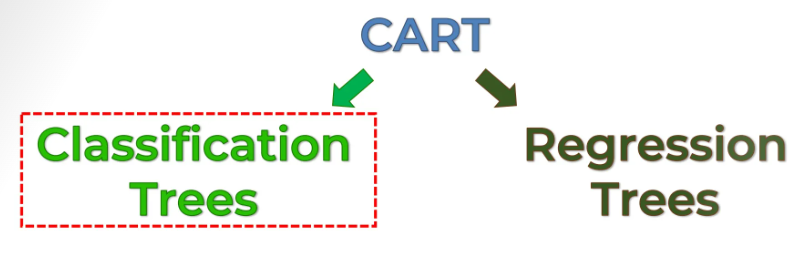
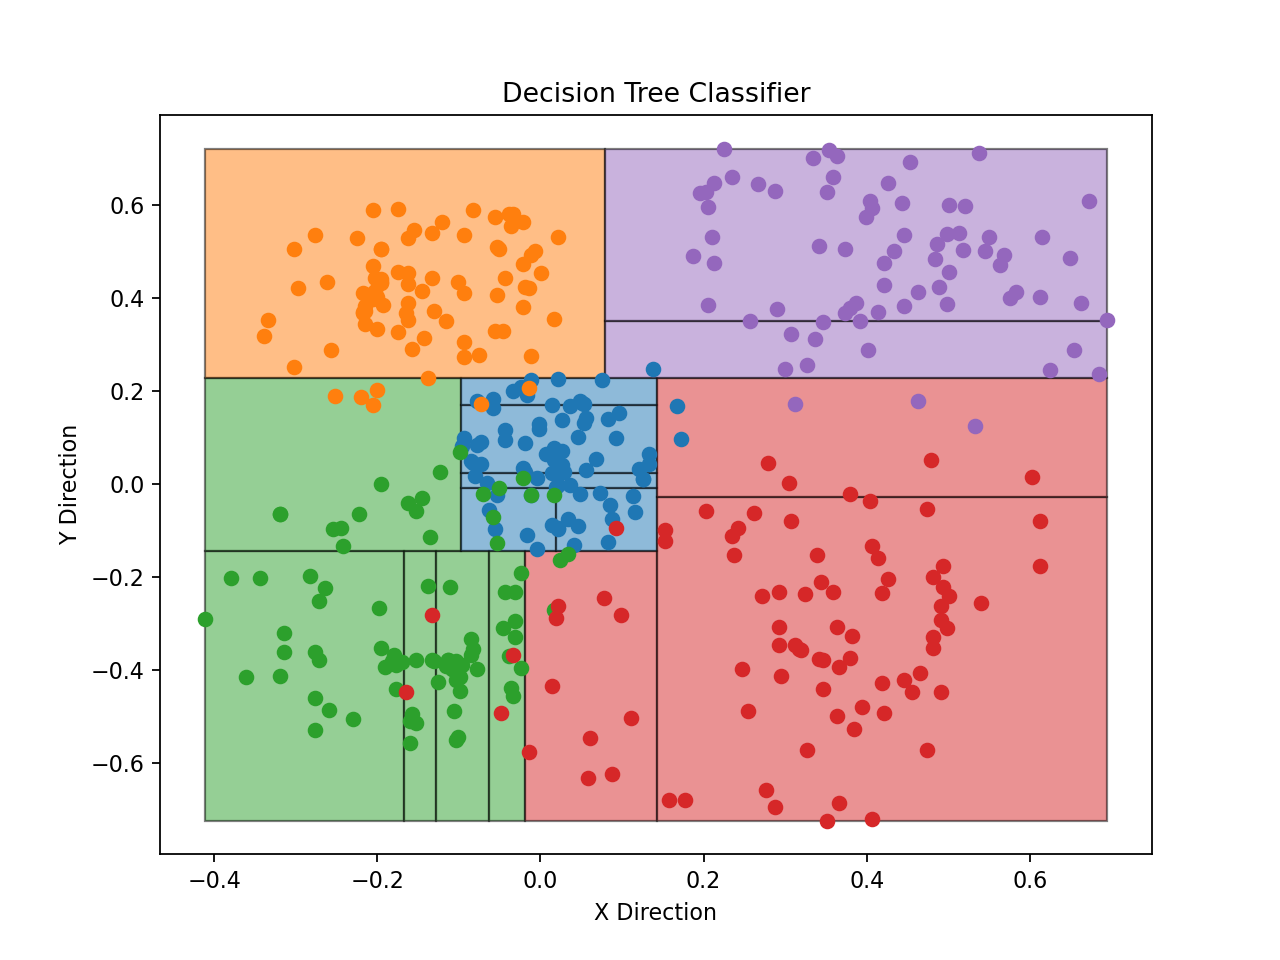
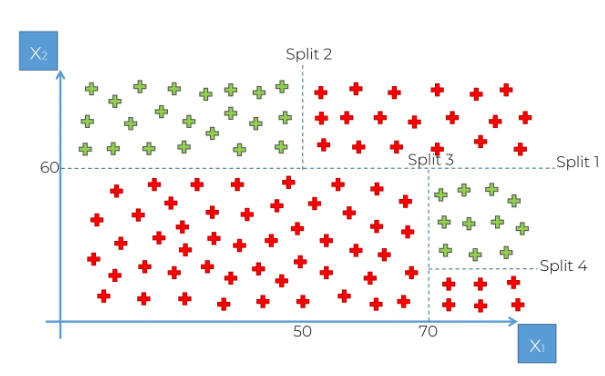
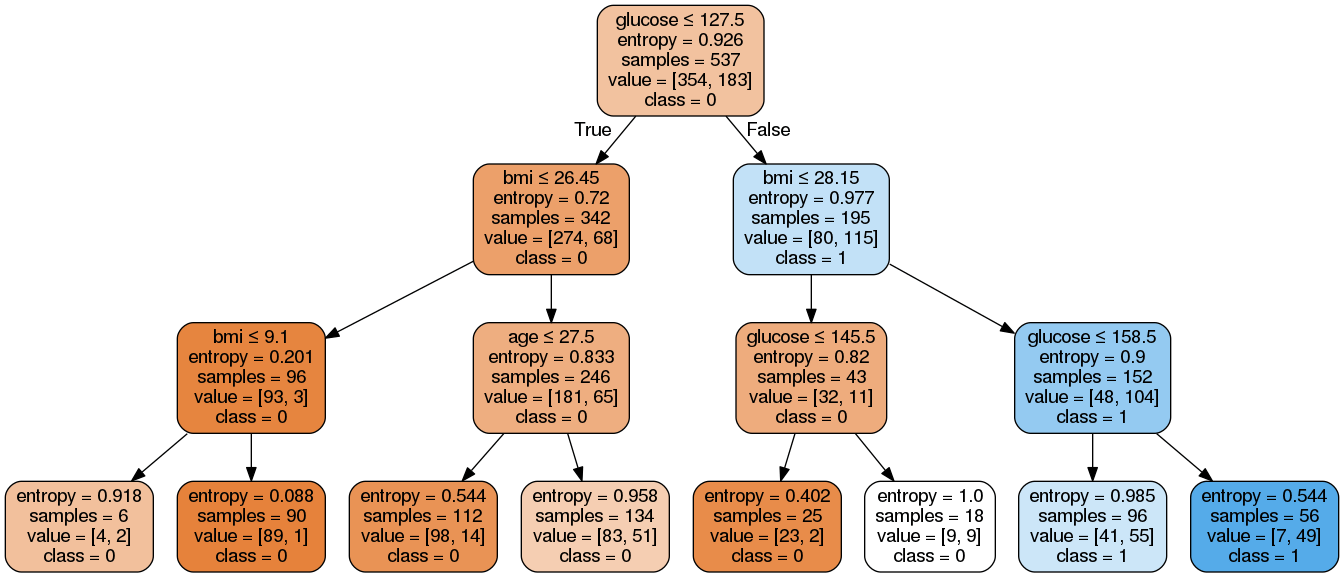

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [18]:
dataset = pd.read_csv("Social_Network_Ads.csv")

print(f"Dataset: \n{dataset}\n")

description = dataset.describe()

print(f"Description: \n{description}\n")

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

print(f"X: \n{X}\n")
print(f"y: \n{y}\n")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

Dataset: 
     Age  EstimatedSalary  Purchased
0     19            19000          0
1     35            20000          0
2     26            43000          0
3     27            57000          0
4     19            76000          0
..   ...              ...        ...
395   46            41000          1
396   51            23000          1
397   50            20000          1
398   36            33000          0
399   49            36000          1

[400 rows x 3 columns]

Description: 
              Age  EstimatedSalary   Purchased
count  400.000000       400.000000  400.000000
mean    37.655000     69742.500000    0.357500
std     10.482877     34096.960282    0.479864
min     18.000000     15000.000000    0.000000
25%     29.750000     43000.000000    0.000000
50%     37.000000     70000.000000    0.000000
75%     46.000000     88000.000000    1.000000
max     60.000000    150000.000000    1.000000

X: 
[[    19  19000]
 [    35  20000]
 [    26  43000]
 [    27  57000]
 [    19  7

In [19]:
standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.transform(X_test)

print(f"X_train: \n{X_train}\n")
print(f"X_test: \n{X_test}\n")

X_train: 
[[-8.13439174e-02 -5.23718184e-01]
 [-1.04209885e+00  5.21009631e-01]
 [-1.71462730e+00  3.17868111e-01]
 [ 1.07156200e+00  4.33948979e-01]
 [ 2.06882562e-01 -3.20576665e-01]
 [-1.71462730e+00 -1.39432470e+00]
 [-7.53872369e-01  1.30455549e+00]
 [ 1.47315756e-02  1.18847462e+00]
 [-8.13439174e-02 -4.65677750e-01]
 [ 7.83335520e-01  7.24151150e-01]
 [-1.33032533e+00 -4.65677750e-01]
 [ 3.02958055e-01 -5.52738401e-01]
 [-1.77419410e-01  1.56573745e+00]
 [ 1.47315756e-02  2.59827677e-01]
 [-1.52247631e+00 -1.53942578e+00]
 [-1.52247631e+00  2.88847894e-01]
 [-1.42640082e+00 -1.24922361e+00]
 [-2.73494904e-01 -1.75475579e-01]
 [-2.73494904e-01  7.53171367e-01]
 [ 1.47315756e-02 -6.10778836e-01]
 [-1.33032533e+00 -1.27824383e+00]
 [-9.46023355e-01  4.62969197e-01]
 [-3.69570397e-01 -8.13920355e-01]
 [ 1.10807069e-01  1.14726592e-01]
 [-4.65645890e-01  1.21749484e+00]
 [ 1.93624144e+00  8.69252236e-01]
 [ 1.10807069e-01  1.47867679e+00]
 [-1.13817434e+00 -1.13314274e+00]
 [-2.73494

In [20]:
decision_tree_classifier = DecisionTreeClassifier(criterion = "entropy", random_state = 0)
decision_tree_classifier.fit(X_train, y_train)

prediction = decision_tree_classifier.predict(standard_scaler.transform(
    [
        [27, 84000]
    ]
))

print(f"1. Prediciton: {prediction}\n")

y_predicted = decision_tree_classifier.predict(X_test)

print(f"2. y_predicted: \n{y_predicted}\n")

confusion_matrix_result = confusion_matrix(y_true = y_test, y_pred = y_predicted)

print(f"3. Confusion matrix: \n{confusion_matrix_result}\n")

accuracy_score = accuracy_score(y_true = y_test, y_pred = y_predicted)

print(f"4. Accuracy score: {accuracy_score}\n")

classification_report_result = classification_report(y_true = y_test, y_pred = y_predicted)

print(f"5. Classification report: \n{classification_report_result}\n")

1. Prediciton: [0]

2. y_predicted: 
[0 1 0 1 0 1 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0
 0 0 1 1 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 1 0]

3. Confusion matrix: 
[[58  7]
 [10 25]]

4. Accuracy score: 0.83

5. Classification report: 
              precision    recall  f1-score   support

           0       0.85      0.89      0.87        65
           1       0.78      0.71      0.75        35

    accuracy                           0.83       100
   macro avg       0.82      0.80      0.81       100
weighted avg       0.83      0.83      0.83       100




In [ ]:
X_set, y_set = standard_scaler.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, decision_tree_classifier.predict(standard_scaler.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('salmon', 'dodgerblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('salmon', 'dodgerblue'))(i), label = j)
plt.title('Decision Tree Classifier (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

C:\Users\PanCh\AppData\Local\Temp\ipykernel_9864\3116465653.py:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('salmon', 'dodgerblue'))(i), label = j)


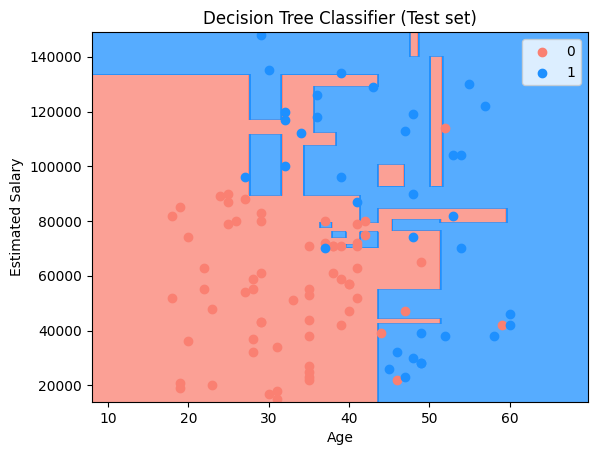

In [22]:
X_set, y_set = standard_scaler.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, decision_tree_classifier.predict(standard_scaler.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('salmon', 'dodgerblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('salmon', 'dodgerblue'))(i), label = j)
plt.title('Decision Tree Classifier (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()